In [1]:
import pandas as pd
import os
import time
import sys
from datetime import datetime
from time import mktime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import re
from Quandl import Quandl
import numpy as np
from sklearn import svm, preprocessing
from __future__ import division
import warnings
from collections import Counter

warnings.filterwarnings("ignore", category=DeprecationWarning)

auth_tok = "-EWms6UQtCVvQ8-drkxv"

%matplotlib inline



class Unbuffered(object):
   def __init__(self, stream):
       self.stream = stream
   def write(self, data):
       self.stream.write(data)
       self.stream.flush()
   def __getattr__(self, attr):
       return getattr(self.stream, attr)

sys.stdout = Unbuffered(sys.stdout)


In [2]:
path = "/Users/Shawn/GitHub/52weeks-bigfiles/8-stockprediction/intraQuarter" 


In [ ]:
##STRUCTURE HISTORICAL DATA##
def Key_Stats (gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    statspath = path + '/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])
    
    sp500_df = pd.DataFrame.from_csv("YAHOO-INDEX_GSPC.csv")
    stock_df = pd.DataFrame.from_csv("stock_prices.csv")
    
    ticker_list = []
    

    for each_dir in stock_list[1:]:
        each_file = os.listdir(each_dir)
        ticker = each_dir.split('/Users/Shawn/GitHub/52weeks-bigfiles/8-stockprediction/intraQuarter/_KeyStats/')[1]
        ticker_list.append(ticker)
        
#         starting_stock_value = False
#         starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                full_file_path = each_dir + '/' + file
                source = open(full_file_path,'r').read()
                try:
                    value_list = []
                    
                    for each_data in gather:    
                        try:
                            regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value = re.search(regex , source)
                            value = (value.group(1))
                            
                            if "B" in value:
                                value = float(value.replace("B",''))*1000000000
                            elif "M" in value: 
                                value = float(value.replace("M",''))*1000000
                            
                            value_list.append(value)

                            
                        except Exception as e:
                            value = "N/A"
                            value_list.append(value)
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        sp500_value = float(row["Adj Close"])
                    except:
                        try:
                            sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row = sp500_df[(sp500_df.index == sp500_date)]
                            sp500_value = float(row["Adj Close"])
                        except Exception as e:
                            print "fapsdolkfhasf;lsak",str(e)


                    one_year_later = int(unix_time + 31536000)

                    try:
                        sp500_1y = datetime.fromtimestamp(one_year_later).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_1y)]
                        sp500_1y_value = float(row["Adj Close"])
                    except:
                        try:
                            sp500_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%Y-%m-%d')
                            row = sp500_df[(sp500_df.index == sp500_1y)]
                            sp500_1y_value = float(row["Adj Close"])
                        except Exception as e:
                            print "sp500 1 year later issue",str(e)



                    try:
                        stock_price_1y = datetime.fromtimestamp(one_year_later).strftime('%Y-%m-%d')
                        row = stock_df[(stock_df.index == stock_price_1y)][ticker.upper()]
                        

                        stock_1y_value = round(float(row),2)
##                        print(stock_1y_value)
##                        time.sleep(1555)
                    
                    except Exception as e:
                        try:
                            stock_price_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%Y-%m-%d')
                            row = stock_df[(stock_df.index == stock_price_1y)][ticker.upper()]
                            stock_1y_value = round(float(row),2)
                        except Exception as e:
                            print "stock price:",str(e)




                    try:
                        stock_price = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = stock_df[(stock_df.index == stock_price)][ticker.upper()]
                        stock_price = round(float(row),2)
                    
                    except Exception as e:
                        try:
                            stock_price = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row = stock_df[(stock_df.index == stock_price)][ticker.upper()]
                            stock_price = round(float(row),2)
                        except Exception as e:
                            print "stock price:",str(e)
    
                        
                    stock_p_change = round(((stock_1y_value - stock_price ) / stock_price * 100),2)
                    sp500_p_change = round(((sp500_1y_value - sp500_value ) / sp500_value * 100),2)
                    
                    difference = stock_p_change - sp500_p_change
                    if difference > 5:
                        status = 1
                    else:
                        status = 0
                        
                    if value_list.count("N/A") > 15:
                        pass
                    else:
                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                except Exception as e:
                    pass
                
#     for each_ticker in ticker_list:
#         try:
#             plot_df = df[(df['Ticker'] == each_ticker)]
#             plot_df = plot_df.set_index(['Date'])
            
#             if plot_df['Status'][-1] == "underperform":
#                 color = 'r'
#             else:
#                 color = 'g'
            
#             plot_df['Difference'].plot(label = each_ticker, color = color)
#             plt.legend()
#             plt.axes()
            
#         except:
#             pass
#     plt.show()

    df.to_csv("key_stats_acc_perf_WITH_NA_enhanced.csv")
    
        
Key_Stats()


In [ ]:
##STRUCTURE FORWARD DATA##
def Forward(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
##    statspath = path+'/_KeyStats'
##    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])


    file_list = os.listdir("forward")

    for each_file in file_list:

        ticker = each_file.split(".html")[0]
        full_file_path = "forward/"+each_file
        source = open(full_file_path,"r").read()


        

        try:
            value_list = []

            for each_data in gather:
                try:
                    regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?'
                    value = re.search(regex, source)
                    value = (value.group(1))

                    if "B" in value:
                        value = float(value.replace("B",''))*1000000000

                    elif "M" in value:
                        value = float(value.replace("M",''))*1000000

                    value_list.append(value)
                    
                    
                except Exception as e:
                    value = "N/A"
                    value_list.append(value)

            if value_list.count("N/A") > 0:
                pass
            else:
                

                df = df.append({'Date':"N/A",
                                    'Unix':"N/A",
                                    'Ticker':ticker,
                                    
                                    'Price':"N/A",
                                    'stock_p_change':"N/A",
                                    'SP500':"N/A",
                                    'sp500_p_change':"N/A",
                                    'Difference':"N/A",
                                    'DE Ratio':value_list[0],
                                    #'Market Cap':value_list[1],
                                    'Trailing P/E':value_list[1],
                                    'Price/Sales':value_list[2],
                                    'Price/Book':value_list[3],
                                    'Profit Margin':value_list[4],
                                    'Operating Margin':value_list[5],
                                    'Return on Assets':value_list[6],
                                    'Return on Equity':value_list[7],
                                    'Revenue Per Share':value_list[8],
                                    'Market Cap':value_list[9],
                                     'Enterprise Value':value_list[10],
                                     'Forward P/E':value_list[11],
                                     'PEG Ratio':value_list[12],
                                     'Enterprise Value/Revenue':value_list[13],
                                     'Enterprise Value/EBITDA':value_list[14],
                                     'Revenue':value_list[15],
                                     'Gross Profit':value_list[16],
                                     'EBITDA':value_list[17],
                                     'Net Income Avl to Common ':value_list[18],
                                     'Diluted EPS':value_list[19],
                                     'Earnings Growth':value_list[20],
                                     'Revenue Growth':value_list[21],
                                     'Total Cash':value_list[22],
                                     'Total Cash Per Share':value_list[23],
                                     'Total Debt':value_list[24],
                                     'Current Ratio':value_list[25],
                                     'Book Value Per Share':value_list[26],
                                     'Cash Flow':value_list[27],
                                     'Beta':value_list[28],
                                     'Held by Insiders':value_list[29],
                                     'Held by Institutions':value_list[30],
                                     'Shares Short (as of':value_list[31],
                                     'Short Ratio':value_list[32],
                                     'Short % of Float':value_list[33],
                                     'Shares Short (prior ':value_list[34],
                                    'Status':"N/A"},
                                   ignore_index=True)
        except Exception as e:
            pass



    df.to_csv("forward_sample_NO_NA.csv")
    
        

    


Forward()

In [11]:
##LEARNING WITH FORWARD##
 
how_much_better = 5

FEATURES =  ['DE Ratio',
             'Trailing P/E',
             'Price/Sales',
             'Price/Book',
             'Profit Margin',
             'Operating Margin',
             'Return on Assets',
             'Return on Equity',
             'Revenue Per Share',
             'Market Cap',
             'Enterprise Value',
             'Forward P/E',
             'PEG Ratio',
             'Enterprise Value/Revenue',
             'Enterprise Value/EBITDA',
             'Revenue',
             'Gross Profit',
             'EBITDA',
             'Net Income Avl to Common ',
             'Diluted EPS',
             'Earnings Growth',
             'Revenue Growth',
             'Total Cash',
             'Total Cash Per Share',
             'Total Debt',
             'Current Ratio',
             'Book Value Per Share',
             'Cash Flow',
             'Beta',
             'Held by Insiders',
             'Held by Institutions',
             'Shares Short (as of',
             'Short Ratio',
             'Short % of Float',
             'Shares Short (prior ']

def Status_Calc(stock, sp500):
    difference = stock - sp500
    if difference > how_much_better:
        return 1
    else:
        return 0

def Build_Data_Set():
    data_df = pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA_enhanced.csv")

    #data_df = data_df[:100]
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    data_df = data_df.replace("NaN",0).replace("N/A",0)
    
    data_df["Status2"] = list(map(Status_Calc,data_df["stock_p_change"],data_df["sp500_p_change"]))

    X = np.array(data_df[FEATURES].values)
    

    y = (data_df["Status2"].values.tolist())
    
    
    X = preprocessing.scale(X)
    
    Z = np.array(data_df[["stock_p_change","sp500_p_change"]])


    return X,y,Z

def Analysis():
    
    test_size = 500
    
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    
    X, y, Z = Build_Data_Set()
    print len(X)
    
    
    clf = svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X[:-test_size],y[:-test_size])
              
    correct_count = 0
    
    for x in range(1, test_size + 1):
        if clf.predict(X[-x])[0] == y[-x]:
            correct_count += 1
            
        if clf.predict(X[-x])[0] == 1:
            invest_return = invest_amount + (invest_amount * (Z[-x][0]/100))
            market_return = invest_amount + (invest_amount * (Z[-x][1]/100))
            
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
            
    print "Accuracy: " , correct_count / test_size *100.00
    print "Total Trades: " , total_invests
    print "Ending with Strategy: ", if_strat
    print "Ending with Market: " , if_market
    
    compared = (if_strat - if_market)/if_market *100
    
    do_nothing = total_invests * invest_amount
    
    avg_market = (if_market - do_nothing) / do_nothing * 100
    avg_strat = (if_strat - do_nothing) / do_nothing * 100
    
    print "Compared to market we earn" , str(compared)+"% more"
    print "Average strategy return: ", str(avg_strat)+"%"
    print "Average market return: ", str(avg_market)+"%"
    
    data_df = pd.DataFrame.from_csv("forward_sample_NO_NA.csv")
    data_df = data_df.replace("N/A",0).replace("NaN",0)
    
    X = np.array(data_df[FEATURES].values)    
    
    X = preprocessing.scale(X)
    
    Z = data_df["Ticker"].values.tolist()
    
    invest_list = []
    
    for i in range(len(X)):
        p = clf.predict(X[i])[0]
        if p == 1:
#             print Z[i]
            invest_list.append(Z[i])
#     print len(invest_list)
#     print invest_list
    return invest_list

final_list = []

loops = 5

for x in range(loops):
    stock_list = Analysis()
    for e in stock_list:
        final_list.append(e)
        
x = Counter(final_list)

print 15*"_"
for each in x:
    if x[each] > loops - (loops/3):
        print(each)
print 15*"_"


2965
Accuracy:  56.4
Total Trades:  21
Ending with Strategy:  275821.0
Ending with Market:  233448.0
Compared to market we earn 18.1509372537% more
Average strategy return:  31.3433333333%
Average market return:  11.1657142857%
2965
Accuracy:  56.8
Total Trades:  40
Ending with Strategy:  521847.0
Ending with Market:  446717.0
Compared to market we earn 16.8182540624% more
Average strategy return:  30.46175%
Average market return:  11.67925%
2965
Accuracy:  57.0
Total Trades:  26
Ending with Strategy:  394235.0
Ending with Market:  287614.0
Compared to market we earn 37.0708658132% more
Average strategy return:  51.6288461538%
Average market return:  10.6207692308%
2965
Accuracy:  59.8
Total Trades:  34
Ending with Strategy:  463865.0
Ending with Market:  376486.0
Compared to market we earn 23.2090967526% more
Average strategy return:  36.4308823529%
Average market return:  10.7311764706%
2965
Accuracy:  59.0
Total Trades:  43
Ending with Strategy:  555726.0
Ending with Market:  490084

/Users/Shawn/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
##DOWNLOAD FROM QUANDL##

def Stock_Prices():
    df = pd.DataFrame()
    statspath = path + "/_KeyStats"
    stock_list = [x[0] for x in os.walk(statspath)]
    
    for each_dir in stock_list[1:]:
        try:
            ticker = each_dir.split('/Users/Shawn/GitHub/52weeks-bigfiles/8-stockprediction/intraQuarter/_KeyStats/')[1]
    
            name = "WIKI/"+ticker.upper()
            data = Quandl.get(name,
                             trim_start = "2000-12-12", 
                              trim_end = "2014-12-30", 
                              authtoken = auth_tok)
            data[ticker.upper()] = data["Adj. Close"]
            df = pd.concat([df,data[ticker.upper()]], axis = 1)
        except Exception as e:
            print str(e)
            
    df.to_csv("stock_prices.csv")
    
Stock_Prices()

In [ ]:
##DOWNLOAD FROM YAHOO##
import urllib2
from urllib2 import Request

def Check_Yahoo():
    statspath = path+"/_KeyStats"
    stock_list = [x[0] for x in os.walk(statspath)]
    
    for e in stock_list[1:]:

        time.sleep(1)
        try:
            e = e.replace(path + '/_KeyStats/','')
            link = "http://finance.yahoo.com/q/ks?s="+e.upper()+"+Key+Statistics"
            req = Request(link)
            resp = urllib2.urlopen(req).read()
            
            
            save = "forward/"+str(e)+".html"
            store = open(save,"w")
            store.write(str(resp))
            store.close()
            
        except Exception as e:
            print str(e)
            time.sleep(1)

Check_Yahoo()

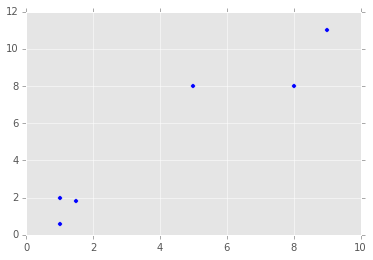

[1]


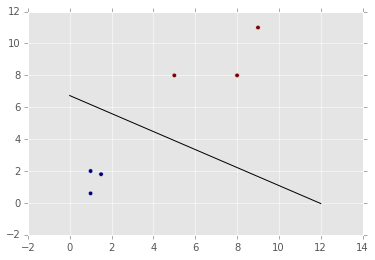

In [5]:
##SVM Tutorial - Supervised Training##
from sklearn import svm


#Sample Data
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,.6],
             [9,11]])

plt.scatter(X[:,0],X[:,1])
plt.show()

#Supervised learning: We label data
y = [0,1,0,1,0,1]

#Machine Learning
clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(X,y)

#Prediction
print clf.predict([4,6])


#Visualize Machine Learning
w = clf.coef_[0]

a = -w[0] / w[1]

xx= np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()



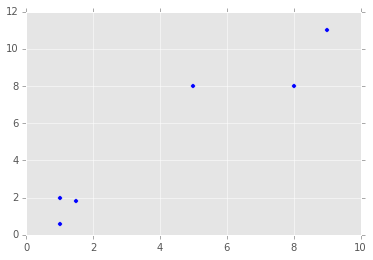

Centroids: [[  5.           8.        ]
 [  1.16666667   1.46666667]
 [  9.          11.        ]
 [  8.           8.        ]]
Labels: [1 0 1 3 1 2]
Coordinate:  [ 1.  2.] Label:  1
Coordinate:  [ 5.  8.] Label:  0
Coordinate:  [ 1.5  1.8] Label:  1
Coordinate:  [ 8.  8.] Label:  3
Coordinate:  [ 1.   0.6] Label:  1
Coordinate:  [  9.  11.] Label:  2


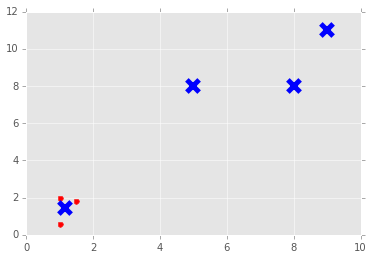

In [8]:
##KMeans Tutorial (Flat Clustering)- Unsupervised Training##
from sklearn.cluster import KMeans

#Sample Data
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,.6],
             [9,11]])

plt.scatter(X[:,0],X[:,1])
plt.show()

#Machine Learning
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)


#Visualize Machine Learning
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print "Centroids:", centroids
print "Labels:", labels

colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print "Coordinate: ", X[i], "Label: ", labels[i]
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s= 150, linewidths = 5, zorder = 10)
plt.show()


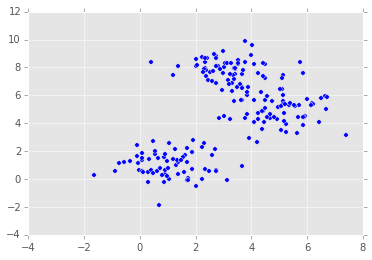

Number of estimated clusters: 2


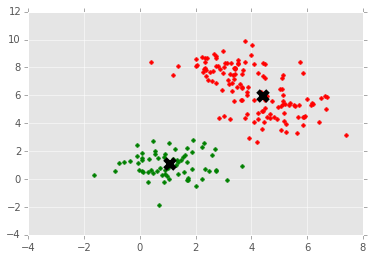

Cluster centers: [[ 4.41769924  5.92871435]
 [ 1.0755321   1.08528898]]


In [10]:
##MeanShift Tutorial (Hierarchial Clustering)- Unsupervised Training##
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs

#Make Sample Data
centers = [[1,1],[5,5],[3,8]]

X, _ = make_blobs(n_samples = 200, centers = centers, cluster_std = 1)

plt.scatter(X[:,0],X[:,1])
plt.show()

#Mean Shift Learning
ms = MeanShift()
ms.fit(X)

#Visualize Machine Learning
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters = len(np.unique(labels))
print "Number of estimated clusters:" , n_clusters
colors = 10*['r.','g.','b.','c.','k.','y,','m.']

for i in range(len(X)):
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize = 7)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker = "x", s = 100, linewidth = 5, zorder = 10, color = 'k')
plt.show()

print "Cluster centers:" , cluster_centers